In [11]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


#csv 파일을 넘파이 배열로 변환, 데이터 구분자는 쉼표(,)이고 맨 윗줄은 NaN 값이므로 한줄 스킵했어요.
sn = np.genfromtxt('supernova.csv', delimiter=',', skip_header=1)
target = sn[ : , 2]
print(sn)
print(target)

[[202.20719102 333.38999974   1.        ]
 [214.42450051 374.53102925   1.        ]
 [476.31797664 255.62337335   3.        ]
 ...
 [502.04041683 219.92738779   3.        ]
 [383.56418134 304.98344407   3.        ]
 [361.05738184 169.89960513   2.        ]]
[1. 1. 3. ... 3. 3. 2.]


In [12]:
sn = np.delete(sn, 2, axis=1)
print(sn)

[[202.20719102 333.38999974]
 [214.42450051 374.53102925]
 [476.31797664 255.62337335]
 ...
 [502.04041683 219.92738779]
 [383.56418134 304.98344407]
 [361.05738184 169.89960513]]


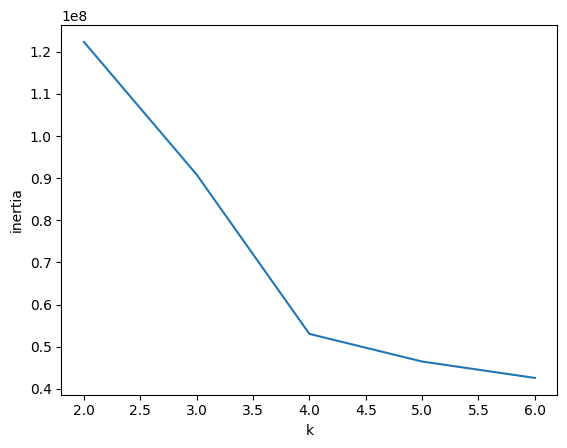

In [13]:
inertia = []
for k in range(2, 7):#범위는 대략적으로 지정했습니다. 필요에 따라 넓어질 수 있어요!
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(sn)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [14]:
# KMeans 를 이용해 군집화 실행하고 라벨 개수 파악하기
km = KMeans(n_clusters=4, random_state=23)
km.fit(sn)
print(np.unique(km.labels_, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2, 3], dtype=int32), array([2587, 2681, 3044, 2402]))


Text(0.5, 1.0, 'Machine')

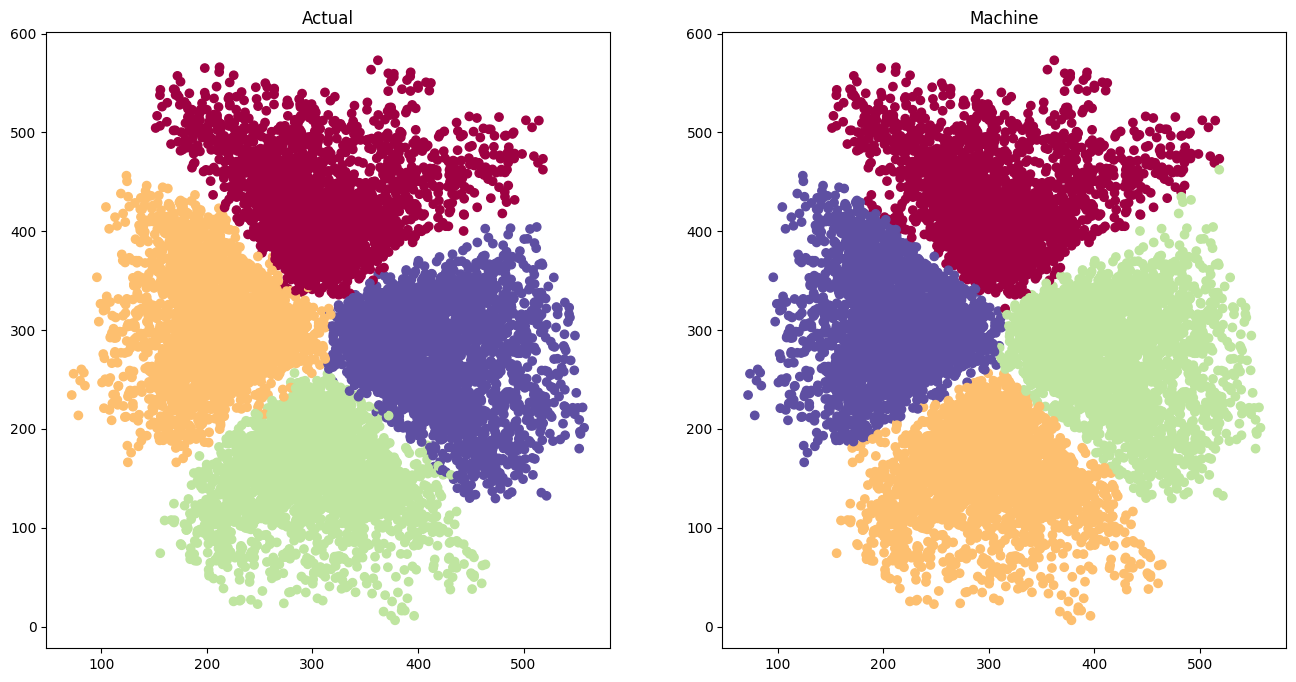

In [16]:
# 산점도로 각 군집의 분포도 나타내보기
fig, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].scatter(sn[:, 0], sn[:, 1], c=target, cmap='Spectral')
axs[1].scatter(sn[:, 0], sn[:, 1], c=km.labels_, cmap='Spectral')
axs[0].set_title('Actual')
axs[1].set_title('Machine')